In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix, accuracy_score, classification_report,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from treatment import get_treated_data

In [26]:
X_train, X_test, y_train, y_test = get_treated_data()

In [27]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = logreg_model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.9447530864197531


In [30]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1624
           1       0.91      0.98      0.95      1616

    accuracy                           0.94      3240
   macro avg       0.95      0.94      0.94      3240
weighted avg       0.95      0.94      0.94      3240



In [31]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

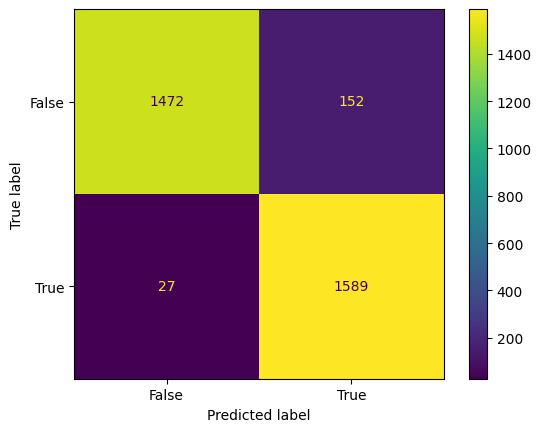

In [32]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [33]:
#Implementação do Grid Search

In [34]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2']}

In [35]:
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced']},
             scoring='f1')

In [36]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'C': 100, 'class_weight': None}


In [37]:
best_logreg_model = grid_search.best_estimator_


In [39]:
best_logreg_model.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000)

In [41]:
grid_pred = best_logreg_model.predict(X_test)

In [42]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9567901234567902


In [43]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1624
           1       0.92      1.00      0.96      1616

    accuracy                           0.96      3240
   macro avg       0.96      0.96      0.96      3240
weighted avg       0.96      0.96      0.96      3240



In [44]:
grid_confusion_matrix = confusion_matrix(y_test, y_pred)

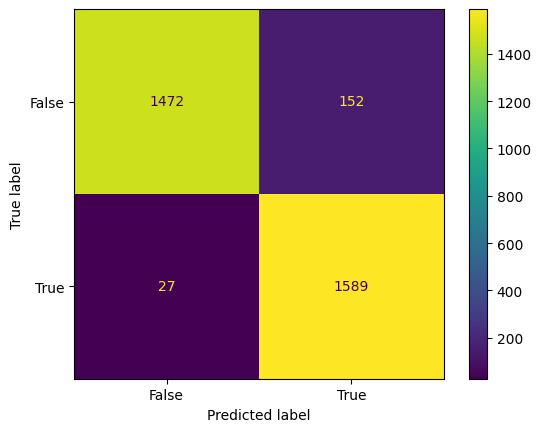

In [45]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()

In [ ]:
# test_text = "Congratulations! You've won a free vacation. Claim your prize now!"

# processed_test_text = finalpreprocess(test_text)

# print("Texto de teste após pré-processamento:", processed_test_text)

# prediction = best_decision_tree_model.predict(processed_test_text)

# if prediction[0]:
#     print("O texto é spam!")
# else:
#     print("O texto não é spam (ham)!")